In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [108]:
locations = np.load('../location_output_all.npy')

In [109]:
velocities = (locations[1:] - locations[:-1])*30
locations = locations[1:]

In [110]:
speeds = np.linalg.norm(velocities, axis=-1)

[(0.0, 1000.0)]

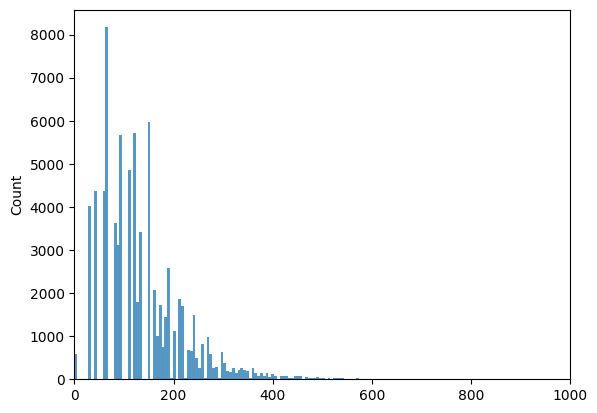

In [111]:
result = sns.histplot(speeds)
result.set(xlim=(0, 1000))

In [112]:
speeds = np.clip(speeds, 0, 220)

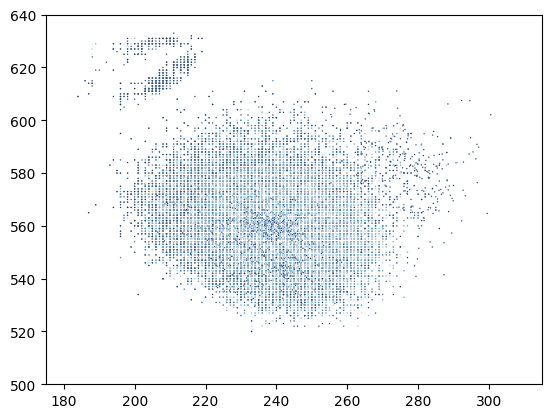

In [113]:
result = sns.scatterplot(x=locations[:,0], y=locations[:,1], c=speeds, s=1, cmap='Blues')
result.set(xlim=(175,315))
result.set(ylim=(500,640))
result.figure.savefig("scatterplot.png")

In [114]:
particles = pd.DataFrame()
particles['x']=locations[:,0]
particles['y']=locations[:,1]
particles['v']=speeds

In [115]:
particles['x'] -= 240
particles['y'] -= 560

<AxesSubplot: xlabel='x', ylabel='y'>

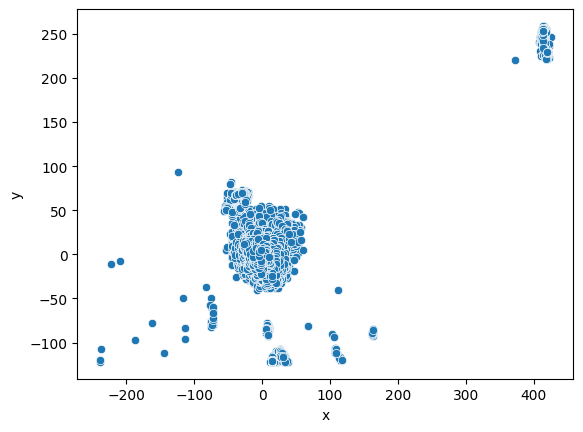

In [116]:
sns.scatterplot(data=particles, x='x', y='y')

In [117]:
particles = particles.loc[particles['x']**2+particles['y']**2 < 100**2]

<AxesSubplot: xlabel='x', ylabel='y'>

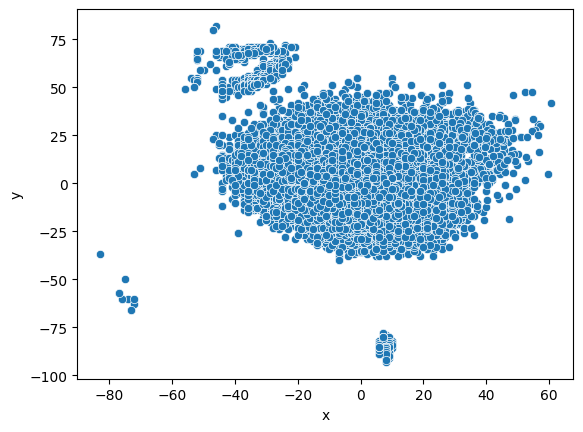

In [118]:
sns.scatterplot(data=particles, x='x', y='y')

In [119]:
particles = particles.loc[particles['y']>-50]

<AxesSubplot: xlabel='x', ylabel='y'>

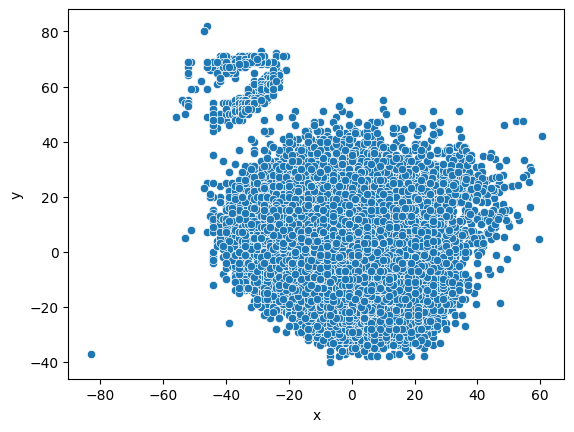

In [120]:
sns.scatterplot(data=particles, x='x', y='y')

In [121]:
particles = particles.loc[particles['y']<75+particles['x']*3/4]

<AxesSubplot: xlabel='x', ylabel='y'>

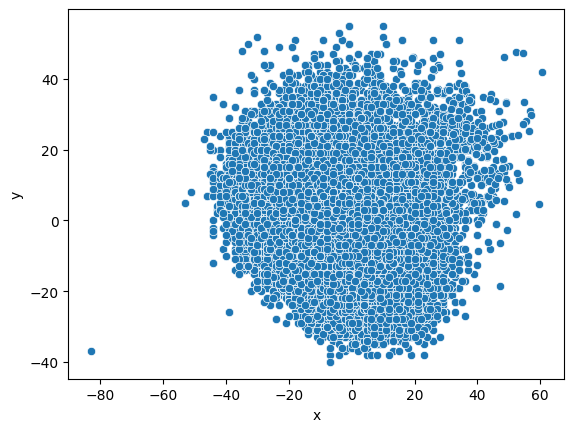

In [122]:
sns.scatterplot(data=particles, x='x', y='y')

In [123]:
particles = particles.loc[particles['x']>-80]

<AxesSubplot: xlabel='x', ylabel='y'>

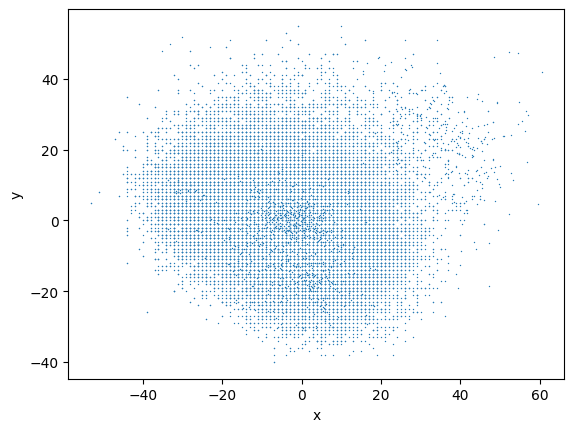

In [124]:
sns.scatterplot(data=particles, x='x', y='y', s=1)

In [125]:
particles['x'] -= np.min(particles['x'])
particles['y'] -= np.min(particles['y'])

In [126]:
print(particles['x'].to_numpy().astype(np.int32))

[50 52 50 ... 48 52 63]


In [127]:
mapp = np.zeros((130,130))
count = np.zeros((130,130))
for i, row in particles.iterrows():
    count[int(row['x']), int(row['y'])] += 1
    mapp[int(row['x']), int(row['y'])] += row['v']
mapp /= count

/tmp/ipykernel_4245/629767374.py:6: RuntimeWarning: invalid value encountered in divide
  mapp /= count


In [128]:
particles.to_hdf('../locations.h5', key='location')

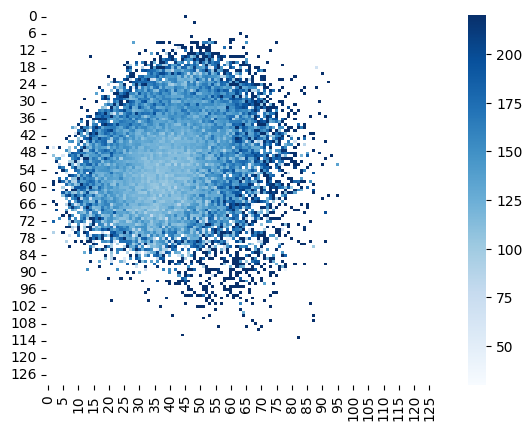

In [133]:
result = sns.heatmap(mapp, cmap="Blues")
result.figure.savefig("velocity-distribution.png")

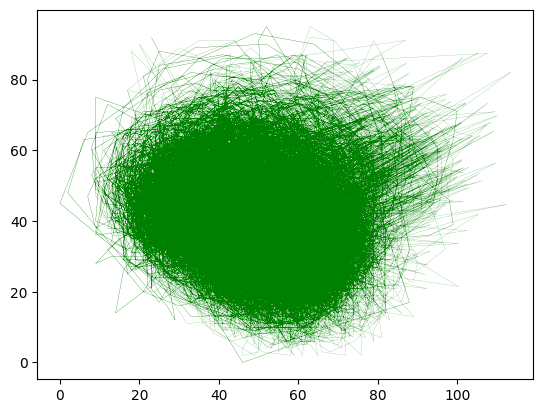

In [130]:
import pylab
pylab.plot(particles['x'], particles['y'], linewidth=0.1, markersize=5, color='green')

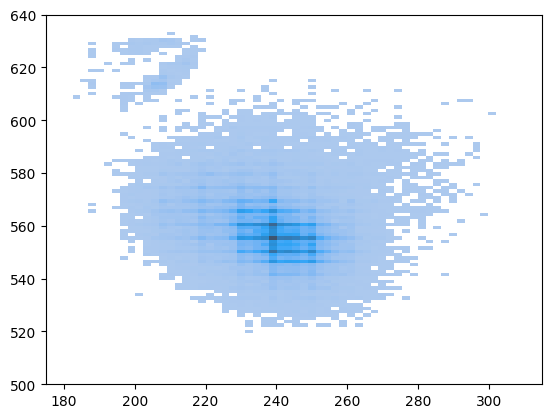

In [131]:
result = sns.histplot(x=locations[:,0], y=locations[:,1],bins=300, discrete=(False, False))
result.set(xlim=(175,315))
result.set(ylim=(500,640))
result.figure.savefig("histplot.png")

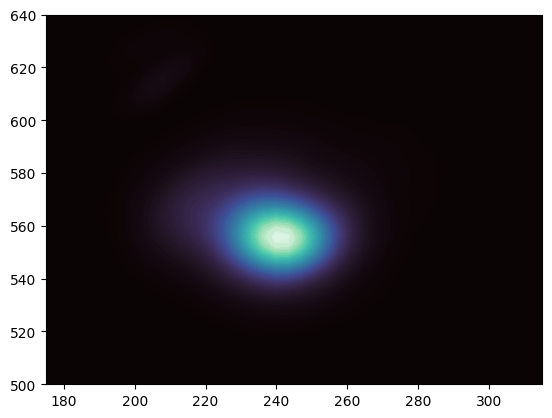

In [132]:
result = sns.kdeplot(x=locations[:,0], y=locations[:,1], fill=True, thresh=0, levels=100, cmap="mako")
result.set(xlim=(175,315))
result.set(ylim=(500,640))
result.figure.savefig("kdeplot.png")